<a href="https://colab.research.google.com/github/ReubenCode/TensorFlow/blob/main/Copy_of_01_neural_Network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#intro to regression with Neural networks in tensorflow
there are many definitions for a regression problem but in our case, we're going to simplify it: predicting numerical variable based on some other combinations of variables, even shorter predicting a number

In [ ]:
# import tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


Creating data to view and fit

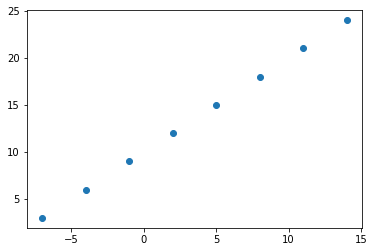

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

#create labels
Y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

#visualize
plt.scatter(X, Y);


In [ ]:
Y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

imput and output shapes

In [ ]:
# Create a demo tensor for out housing price predicition problem.
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
X[0], Y[0]

(-7.0, 3.0)

In [ ]:
input_shape = X.shape
output_shape = Y.shape
input_shape, output_shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
# turn our numpy arrays into tensors
X = tf.constant(X)
Y = tf.constant(Y)
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = Y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

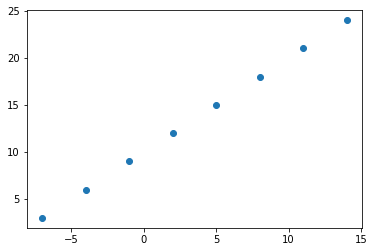

In [ ]:
plt.scatter(X, Y)

# steps in modeling with Tensorflow
1. creating a model - define the input and output layers, as well as hiddel layers of a deep learning model
2. compiling a model - define the loss function in other words the function which tells our model how wrong it is and optimizer tells our models how wrong it is and the optimizer tells our model how to improve the patters its learnnig and evaluating metrics, what we can use to interpret the performance of our model
3. fitting a model - letting the model try to find patterns between X and Y features and labels

In [ ]:
# optionally, the first layer can receive an 'input_shape' argument
#m odel = tf.keras.Sequential()
# model.add(tf.keras.layer.Dense(8, input_shape=(16,)))
# afterwards, we do automatic shape inference:
# model.add(tf.keras.layers.Dense(4))

# model = tf.keras.Sequential()
# model.add(tf.keras.layers.Dense(1))

In [ ]:
# set random seed
tf.random.set_seed(42)
# 1. create a model using the sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                     
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(), #sgd is short for stochastic graditent decent
              metrics=["mae"])
# 3. fit the model
model.fit(tf.expand_dims(X, axis=1), Y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 1s/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 11ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 17ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 25ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 18ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# check out x and y
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# try and make a predicition using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

In [ ]:
y_pred + 11

array([[23.71602]], dtype=float32)

Improving our model
we can improve out model, by altering the steps we took to create a model
1. create a model - here we might add more layers.
increase the nmber of hidden units ( all called neurons), change the activation function of each layer
2. compiling a model - here we might change the optimization function or perhaps the learning rate of the optimizing function
3. fitting a model - here we might fit a model for more EPOCHS ( leave it training for longer or on more data) (give the model more data to learn from )

In [ ]:
# lets rebuild our model 
# 1. create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])
# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics = ["mae"])
# 3. fit the model (this time we'll train for longer)

model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 22ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 16ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 21ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 18ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 30ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 

In [ ]:
# remind ourselves of the data
X, Y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# lets see if our model's prediciiton improves
model.predict([17.0])

array([[29.739855]], dtype=float32)

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation=None),
  tf.keras.layers.Dense(1),
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics = ["mae"])
model.fit(tf.expand_dims(X, axis=1), Y, epochs=100)
            

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 12.0109 - mae: 12.0109
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 11.0827 - mae: 11.0827
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 10.1377 - mae: 10.1377
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1687 - mae: 9.1687
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 8.1666 - mae: 8.1666
Epoch 6/100
1/1 [==============================] - 0s 18ms/step - loss: 7.1234 - mae: 7.1234
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.0477 - mae: 7.0477
Epoch 8/100
1/1 [==============================] - 0s 15ms/step - loss: 7.4551 - mae: 7.4551
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 7.7955 - mae: 7.7955
Epoch 10/100
1/1 [==============================] - 0s 18ms/step - loss: 7.8032 - mae: 7.8032
Epoch 11/100
1/1 [==============================] - 0s 9ms/step - 

In [ ]:
model.predict([17.0])

array([[26.485754]], dtype=float32)

Evaluting a model
In practive, a typical workflow you'll go through when building neural networks is:
---
build a model -> fit it -> evaluate it -> tweak a model -> fit it -. tweak a model -> fit it -> evaluate it...

when it comes to evaluation.. there are 3 words you should memorize
> visualize, visualize, visualize

its a good idea to visualize:
the data - what are we working with? what it look like?
the model itself- what does our model look like?
the training model - how does a model perform while it learns?
the predictions of the modle - how do the predictions of a model line up against the ground truth (the orginal labels)?


In [ ]:
# make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
#make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

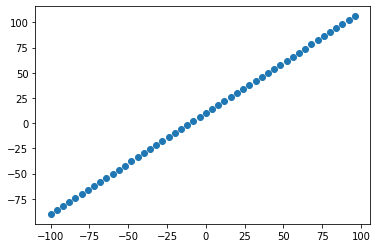

In [ ]:
# visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

# the 3 sets...
* training set - the model learns from this data, which is typically 70-80% of the total data you have available.
*validation set- the model gets tuned on this data, which is typically 10-15% of the ata available.
*test set - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.

In [ ]:
# check the length of how many samples we have
len(X)

50

In [ ]:
# split the data into train and test set
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X [40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### visualing the data
Now we've got our data in training and test sets.. let's viisualize it again!

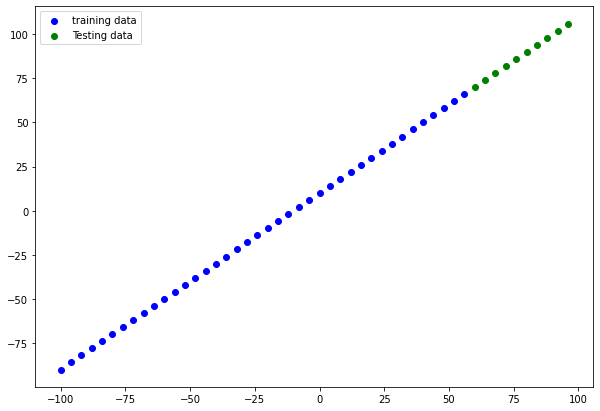

In [ ]:
plt.figure(figsize=(10, 7))
# plot the training data in blue
plt.scatter(X_train, y_train, c="b", label="training data")
#plot the test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# show a legend
plt.legend();

In [ ]:
# let's have a look at how to build a neural network for our data
# 1. create a model
#model = tf.keras.Sequential([
 # tf.keras.layers.Dense(1)
#])

# 2. compile the model
#model.compile(loss=tf.keras.losses.mae,
 #         optimizer=tf.keras.optimizers.SGD(),
 #         metrics=["mae"])

# 3. fit the model
#model.fit(X_train, y_train, epochs=100)

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(), dtype=int32, numpy=-100>,
 <tf.Tensor: shape=(), dtype=int32, numpy=-90>)

In [ ]:
# let's create a model which builds automatically by defining the inout_shape argument
tf.random.set_seed(42)

# 1. create a model ( same as above)
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer"),
],  name="model_1")
# 2. compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________




*   Total params - total number of parameters in the model
*   Trinable parameters - tese are the parameters (patterns) the model can update as it trains
* Non-trainable params - these parameters aren't updated during training ( this is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)


In [ ]:
# let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


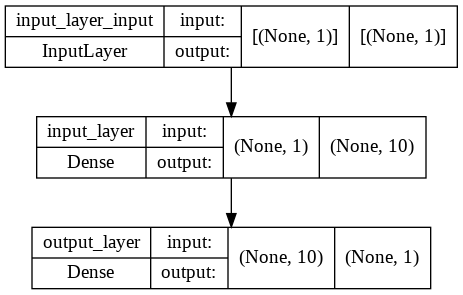

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

### visualizing our models predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels

often you'll see this in the for of 'y_test' or 'y_truth' verses 'y_pred (ground truth  verses your model)

In [ ]:
# make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑If youre going to reuse some kind of function it is a good idea to save it

In [ ]:
# let's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """Plots training data, test data and compares predicitons to the ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  #plot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  #plot models predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  #show the legend
  plt.legend()

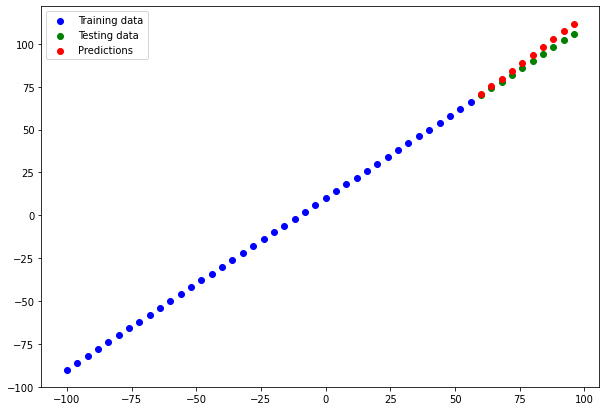

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test,
                 predictions=y_pred)

### evaluting our models predicitons with regression metrics
depending on the problem you're working on, there will be different evaluation metrics to evluate your model's performance

since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, " on average, how wrong is each of my model's predictions"
* MSE - mean square error " square the average errors"

In [ ]:
# evalute the model on the test 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 224ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
# calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.558258 , 14.1160555, 11.708948 , 10.336929 , 10.       ,
       10.698161 , 12.447118 , 15.333002 , 19.253975 , 23.841698 ],
      dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.55218 ,  75.13991 ,  79.72763 ,  84.31535 ,  88.903076,
        93.49081 ,  98.07853 , 102.66625 , 107.253975, 111.8417  ],
      dtype=float32)>

In [ ]:
#calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                       y_pred=tf.squeeze(y_pred))

### Running experiments to improve our model

build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it

1. get more data - get more examples for your model to train on ( more opportunities to learn patters or relationships between features).
2. make your model larger ( using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

let's do 3 modeling experiments:
1. `model_1` - same as the orginal model, 1 layer trained for 100 epochs
2. `model_2` 2 layers, trained for 100 epochs
3. `model_3` 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=[1])
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# 3. fit the model
model_1.fit(X_train, y_train, epochs=100, verbose=1, )

Epoch 1/100
2/2 [==============================] - 0s 8ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 7ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 9ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 8ms/step - l

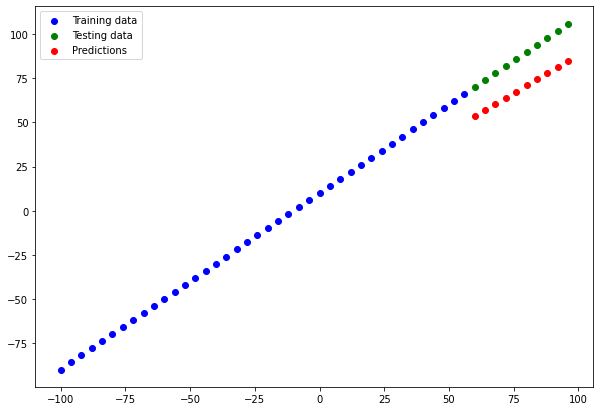

In [ ]:
# make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# create model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build ` model_2**`
* dense layers trained for 100 epochs

In [ ]:
# set random seed
tf. random.set_seed(42)

# create the model.
model_2 = tf.keras.Sequential([
                               tf.keras.layers.Dense(1, input_shape=[1]),
                               tf.keras.layers.Dense(1, input_shape=[1]),
])
#compile the model.
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"] )
#fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 6ms/step - loss: 22.6625 - mae: 22.6625
Epoch 2/100
2/2 [==============================] - 0s 6ms/step - loss: 16.9439 - mae: 16.9439
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 13.8059 - mae: 13.8059
Epoch 4/100
2/2 [==============================] - 0s 6ms/step - loss: 17.4504 - mae: 17.4504
Epoch 5/100
2/2 [==============================] - 0s 6ms/step - loss: 12.0637 - mae: 12.0637
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.8335 - mae: 9.8335
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 10.7023 - mae: 10.7023
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 10.8713 - mae: 10.8713
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 38.0435 - mae: 38.0435
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 25.6226 - mae: 25.6226
Epoch 11/100
2/2 [==============================] - 0s 5ms/st

#All data was lost from model 2-3, moving on

# A larger example


In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
# read in the insurance data set
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
#one-hot encode our data from so its all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# create X & Y values ( features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]

In [ ]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [ ]:
# xreate training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# build a neural network (sort of like model 2)
tf.random.set_seed(42)

# 1. create a model
insurance_model = tf.keras.Sequential([
                                       tf.keras.layers.Dense(10), #had input_shape=[1] code had wrong shape
                                       tf.keras.layers.Dense(1)
])
# 2. compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])
# 3. fit the model
insurance_model.fit(X_train,y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7886.7759 - mae: 7886.7759
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7792.0225 - mae: 7792.0225
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7748.3887 - mae: 7748.3887
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7589.9844 - mae: 7589.9844
Epoch 8/100
34/34 [==============================] - 0s 4ms/step - loss: 7698.5576 - mae: 7698.5576
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7496.7778 - mae: 7496.7778
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7493.1743 - mae: 7493.1743

In [ ]:
# check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

# right now it looks like our model isn't improving too well. lets try and improve it!
to try to improve our model, we'll run 2 experiments:
1. add an extra layer with more hidden units and use the adam optimizer
2. train for longer (200 epochs)
3. personal experimet


In [ ]:
# set random seed
tf.random.set_seed(42)

# 1. create the model
insurance_model_2 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
# 2. compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(), #orginally had SGD() model will not run
                          metrics=["mae"])
# 3. fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7409.0811 - mae:

In [ ]:
#evaluate the larger model
insurance_model_2.evaluate(X_test,y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477


[4924.34765625, 4924.34765625]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

In [ ]:
# set random
tf.random.set_seed(42)

# 1. create the model
insurance_model_3 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
# 2. compile the model 
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13273.1602 - mae: 13273.1602
Epoch 2/200
34/34 [==============================] - 0s 4ms/step - loss: 13104.4297 - mae: 13104.4297
Epoch 3/200
34/34 [==============================] - 0s 4ms/step - loss: 12749.5420 - mae: 12749.5420
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 12055.7500 - mae: 12055.7500
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 10905.8154 - mae: 10905.8154
Epoch 6/200
34/34 [==============================] - 0s 4ms/step - loss: 9457.7217 - mae: 9457.7217
Epoch 7/200
34/34 [==============================] - 0s 3ms/step - loss: 8147.6543 - mae: 8147.6543
Epoch 8/200
34/34 [==============================] - 0s 4ms/step - loss: 7528.8413 - mae: 7528.8413
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 7429.1528 - mae: 7429.1528
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 7409.0811 - mae:

In [ ]:
insurance_model_3.evaluate(X_train, y_train)

34/34 [==============================] - 0s 1ms/step - loss: 3665.3799 - mae: 3665.3799


[3665.3798828125, 3665.3798828125]

In [ ]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 7023.3291 - mae: 7023.3291


[7023.3291015625, 7023.3291015625]

Text(0.5, 0, 'epochs')

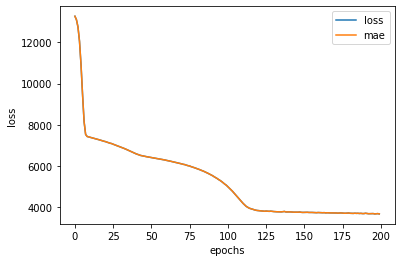

In [ ]:
# plot history ( also know as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

**Question:** how long should you train for?

it depends. It depends on the problem you're working on. However, many people have asked this question before. So tensorfow as a solution! it's called the **EarlyStopping callback**, is a TensorFlow component you can add to your model to stop training once it stops improving a certian metric

## preprocessing data (normalzation and standarization)
In terms of scaling values, neural networks tend to prefer normalization.

if you're not sure which to use. try both and see which one performs better.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# read in the insurnce datafrom
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


TO prepare our data, we can borrow a few classes from Scikit-Learn

In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
# create a column transferformer

ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)
# create our X and y values
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

#Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#fit the column transformer to our training data
ct.fit(X_train)

#transform training and test data with normliation (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#what does our data look like now
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [ ]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [ ]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Data has bee nrmalized and hot encoded. now lets build a neral network model

In [ ]:
# build a neural network model to fit on our normalized data
tf.random.set_seed(42)

# 1, create the model
insurance_model_4 = tf.keras.Sequential([
                                         tf.keras.layers.Dense(100),
                                         tf.keras.layers.Dense(10),
                                         tf.keras.layers.Dense(1)
])
# 2. compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])
# 3. fit the model
insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 13342.6494 - mae: 13342.6494
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 13189.5830 - mae: 13189.5830
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 [==============================] - 0s 4ms/step - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 11925.96

In [ ]:
# evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]

In [ ]:
#insurance model 2 reduction
#9/9 [==============================] - 0s 2ms/step - loss: 4924.3477 - mae: 4924.3477

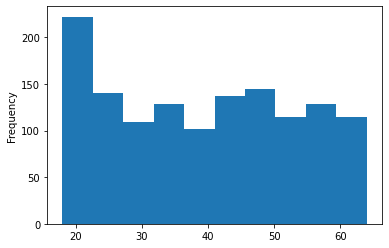

In [ ]:
X["age"].plot(kind="hist")

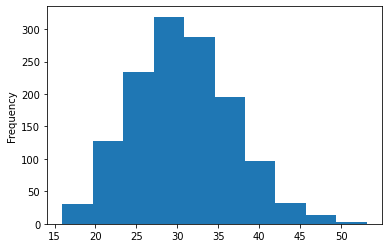

In [ ]:
X["bmi"].plot(kind="hist")

In [ ]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64